In [1]:
import os
from time import sleep
import silayer
from silayer.cfg_reg import VataCfg
import numpy as np
import copy
import h5py
from silayer import raw2hdf
from silayer.cfg_reg import neg_default_vcfg, pos_default_vcfg
from matplotlib import pyplot as plt
import seaborn as sns
import random
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
from numpy import savetxt

### Read in hdf5 file

In [4]:
filename = '../Data/Jan31_Calibrations/NewData/1643653309_6Layer_Jan31_Am241_TrigModON_L2.h5'
f = h5py.File(filename)
#gilename = '../Data/6Layer_SourceTesting_Nov23/1637682088_6Layer_Cd109_ASIC3_CoolersOn_Nov232021.h5'
#g = h5py.File(gilename)

# Gaussian Fit

Amplitude = 10971.260947912053, Mean = 57.093800715008435, Standard Deviation = 8.766880743071669
FWHM: 21.031
Sigma = 8.930327379485734


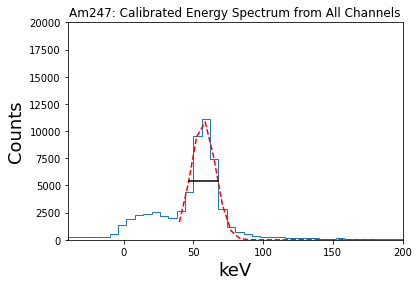

In [14]:
min = 40
maximum = 182 

#Note max - min must be divisible by bin

plotmin = -40
plotmax = 200
bin = 40


channel = 4 #### channel 4 corresponds to the energy channel - the first 4 channels are position


bin_size = (plotmax - plotmin)/bin
y_data = plt.hist(f["layer01/vdata/calib_data"][:,channel], histtype='step', bins= bin, range=[plotmin, plotmax]);
plt.xlim(plotmin,plotmax)
plt.ylim(0,20000)
plt.xlabel('keV', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title('Am247: Calibrated Energy Spectrum from All Channels')

x_data = np.linspace(min, maximum, int((maximum-min)/bin_size + 1))

#Define Gaussian Function
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c , 2)))

#Estimates
amplitude = 10
mean = 60
SD = 10

#Fit the data
pars, cov = curve_fit(f=gaussian, xdata = x_data, ydata=y_data[0][bin-x_data.size-int((plotmax - maximum)/bin_size):bin-int((plotmax - maximum)/bin_size)], p0 = [amplitude, mean, SD])
print("Amplitude = "+str(pars[0])+", Mean = "+str(pars[1])+", Standard Deviation = "+str(pars[2]))

y_gauss = gaussian(x_data, pars[0], pars[1], pars[2])

plt.plot(x_data, y_gauss,'r--');

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]


# find the two crossing points
hmx = half_max_x(x_data,y_gauss)

# print the answer
fwhm = hmx[1] - hmx[0]
print("FWHM: {:.3f}".format(fwhm))
print("Sigma = "+str(fwhm/2.355))

half = max(y_gauss)/2.0
plt.plot(hmx, [half, half],'black')
plt.show()

# Plot all "good" channels summed together

In [10]:
goodChans = [0,1,2,3,4,6,8,10,11,12,13,14,15,18,20,21,22,26,27,28,29,30,31]

plotmin = 60
plotmax = 270
bin = 100
bin_size = (plotmax - plotmin)/bin

asic1sum = np.empty(0)
for i in goodChans:
    asic1sum = np.append(asic1sum, adc1[:,i])

x_data1 = np.linspace(min, maximum, int((maximum-min)/bin_size + 1))
y_data1 = plt.hist(asic1sum, histtype='step', bins= bin, range=[plotmin, plotmax], fill=False);
plt.ylim(0,250)
plt.xlim(plotmin,plotmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


#Estimates
amplitude = 10
mean = 110
SD = 10

#Fit the data
pars, cov = curve_fit(f=gaussian, xdata = x_data1, ydata=y_data1[0][bin-x_data1.size-int((plotmax - maximum)/bin_size):bin-int((plotmax - maximum)/bin_size)], p0 = [amplitude, mean, SD])
print("Amplitude = "+str(pars[0])+", Mean = "+str(pars[1])+", Standard Deviation = "+str(pars[2]))

y_gauss1 = gaussian(x_data1, pars[0], pars[1], pars[2])
#plt.plot(x_data1, y_gauss1,'r--');
plt.xlabel('Energy [keV]', fontsize=18)
plt.ylabel('Counts', fontsize=18)

# find the two crossing points
hmx1 = half_max_x(x_data1,y_gauss1)

# print the answer
fwhm = hmx[1] - hmx[0]
print("FWHM: {:.3f}".format(fwhm))
print("Sigma = "+str(fwhm/2.355))

plt.vlines(x=122, ymin=0, ymax=250, colors='green', ls='--', lw=2, label='vline_single - partial height')
plt.legend(['Calibrated Data', '122 keV Line'])

plt.savefig('Layer2_ASIC1_Co57_CalibrationPlot_Proposal.png', bbox_inches = 'tight')

NameError: name 'adc1' is not defined